https://www.kaggle.com/c/competitive-data-science-final-project

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
path = '/Users/rizki/Dropbox/Coursera/AML_HowToKaggle/FinalProject/PredictSales/all/'

items = pd.read_csv(path+'items.csv')
item_categories = pd.read_csv(path+'item_categories.csv')
shops = pd.read_csv(path+'shops.csv')
sales_train = pd.read_csv(path+'sales_train.csv')
test = pd.read_csv(path+'test.csv')

# Format 'date' to datetime
sales_train['date'] = pd.to_datetime(sales_train['date'],format='%d.%m.%Y')

#add new columns: years, month, Y_M
sales_train['year'] = sales_train['date'].dt.year
sales_train['month'] = sales_train['date'].dt.month

#split by year
sales_train_2013 = sales_train[sales_train['year']==2013]
sales_val_2014 = sales_train[sales_train['year']==2014]
sales_test_2015 = sales_train[sales_train['year']==2015]

# Validation with yearly trend

In [4]:
import sys
WorkDir = '/Users/rizki/Dropbox/Coursera/AML_HowToKaggle/FinalProject/PredictSales/'
sys.path.insert(0, WorkDir)
from utility.utility import plotYearly

y_test = test
y_test['item_cnt_month'] = 0.38 #based on leaderboard probing.
y_test.drop(columns=['shop_id','item_id'],inplace=True)

total sales count from constant_0p38 prediction: 81395.99999999719
total sales count from contant 0.5 prediction: 107100.0


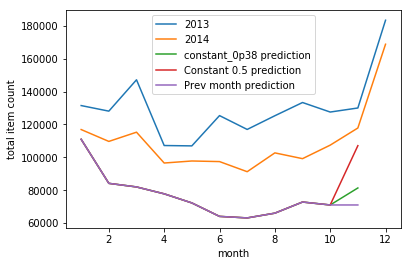

In [5]:
saveName='constant_0p38'
saveplots=True

total_item_cnt_2013 = sales_train_2013.groupby(['date_block_num','year'])['item_cnt_day'].sum().values
total_item_cnt_2014 = sales_val_2014.groupby(['date_block_num','year'])['item_cnt_day'].sum().values
total_item_cnt_2015 = sales_test_2015.groupby(['date_block_num','year'])['item_cnt_day'].sum().values
yearlySales = [total_item_cnt_2013,total_item_cnt_2014,total_item_cnt_2015]

plotYearly(yearlySales,y_test,saveName,saveplots)

# Prepare submission file

In [6]:
submit = y_test

submit = submit[["item_cnt_month"]]
submit.index.name="ID"
submit.head()

submitName='Oct8-2018_3'
if submitName=='': submitName=saveName
    
submit.to_csv('submit_'+submitName+'.csv')